In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

The local asymptotic power of the $t$-test is given by $\Phi(t - z_{1 - \alpha})$ where $t = \mu / \sigma$. Hence, the maximum loss in power from tesing at level $\beta$ can be bounded by $\sup_{t} \Phi(t - z_{1 - \alpha}) - \Phi(t - z_{1 - \beta})$.

In [2]:
FIGURE_SAVEPATH = "../../../figures/"
SAVELABEL = "t_test_non_inferiority"

SAVE = True

In [3]:
alpha_space = [0.05, 1e-4]
alpha_prop_space = np.linspace(0,1,1000)
all_res = {}
for alpha in alpha_space:
    beta_space = alpha * alpha_prop_space
    all_max_power_loss = []
    for beta in beta_space:
        z_alpha = scipy.stats.norm.ppf(1 - alpha)
        z_beta = scipy.stats.norm.ppf(1 - beta)
        t_grid = np.linspace(-5,5,10000)
        max_power_loss = (scipy.stats.norm.cdf(t_grid - z_alpha) - scipy.stats.norm.cdf(t_grid - z_beta)).max()
        all_max_power_loss.append(max_power_loss)
    all_max_power_loss = np.array(all_max_power_loss)
    # Explicitly set first to 1 since we have that by theory and it's numerically unstable
    all_max_power_loss[0] = 1
    all_res[alpha] = (beta_space, all_max_power_loss)

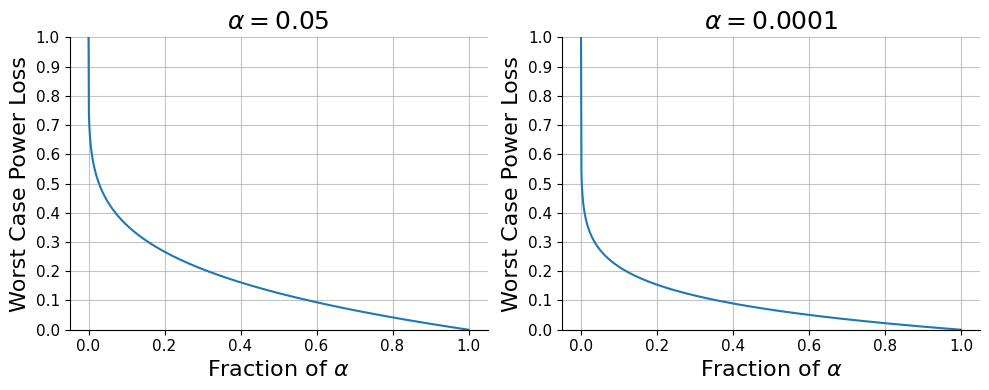

In [4]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

LABEL_FONTSIZE = 16
TITLE_FONTSIZE = 18
TICK_FONTSIZE = 11

for i, alpha in enumerate(alpha_space):
    ax[i].plot(alpha_prop_space, all_res[alpha][1])
    ax[i].set_yticks(np.linspace(0,1,11))
    ax[i].grid(visible=True, alpha=0.75)
    ax[i].set_ylim(0,1)
    ax[i].set_ylabel("Worst Case Power Loss", fontsize=LABEL_FONTSIZE)
    ax[i].set_xlabel(r"Fraction of $\alpha$", fontsize=LABEL_FONTSIZE)
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
    ax[i].set_title(r"$\alpha = {}$".format(alpha), fontsize=TITLE_FONTSIZE)

plt.tight_layout()

# Save
if SAVE:
    plt.savefig(FIGURE_SAVEPATH + "{}.pdf".format(SAVELABEL), bbox_inches="tight", dpi=300)

plt.show()

In [5]:
# Calculate explicitly for alpha / 2
for alpha in alpha_space:
    z_alpha = scipy.stats.norm.ppf(1 - alpha)
    z_beta = scipy.stats.norm.ppf(1 - alpha / 2)
    t_grid = np.linspace(-5,5,10000)
    max_power_loss = (scipy.stats.norm.cdf(t_grid - z_alpha) - scipy.stats.norm.cdf(t_grid - z_beta)).max()
    print("(alpha = {}) Max power loss = {}".format(alpha, max_power_loss))

(alpha = 0.05) Max power loss = 0.12519267095912534
(alpha = 0.0001) Max power loss = 0.06836481577383086
